importing libraries


In [70]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [71]:
data=pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

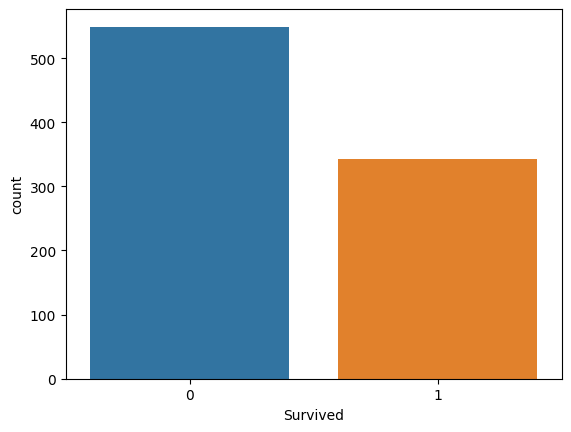

In [72]:
#visualizing the data
sb.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

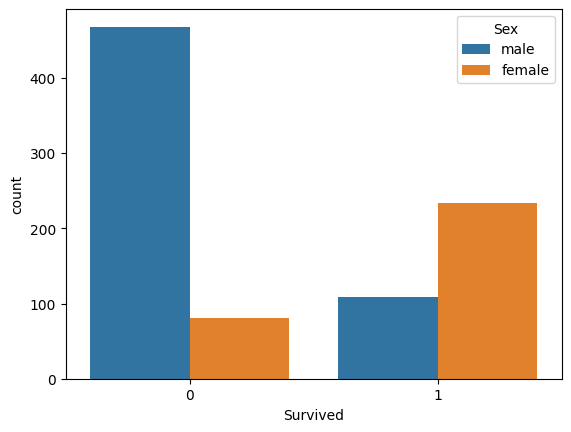

In [73]:
sb.countplot(x="Survived",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

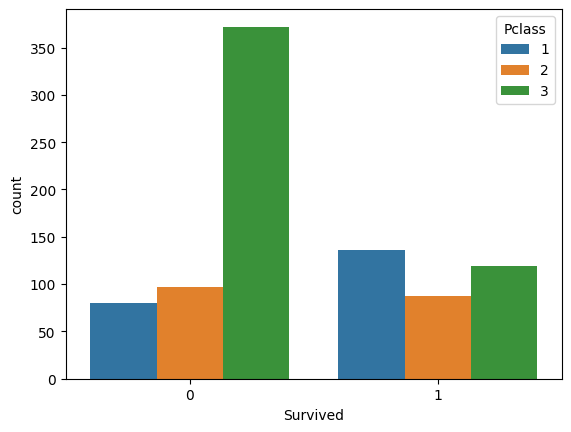

In [74]:
sb.countplot(x="Survived",hue="Pclass",data=data)

<Axes: xlabel='Survived', ylabel='count'>

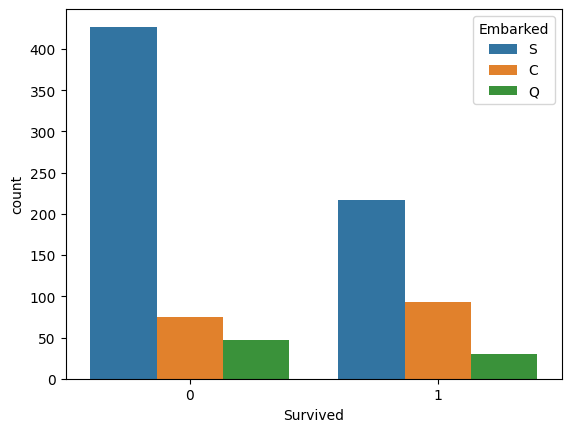

In [75]:
sb.countplot(x="Survived",hue="Embarked",data=data)

In [76]:
data.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Fare"],axis=1,inplace=True)

In [77]:
data.head(2)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C


In [78]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [79]:
data["Age"].fillna(data["Age"].mean(),inplace=True)


In [80]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [81]:
data["Embarked"].fillna("S",inplace=True)

In [82]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [83]:
embarked=pd.get_dummies(data["Embarked"],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [84]:
data=pd.concat([data,sex,embarked],axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Embarked,male,Q,S
0,0,3,male,22.0,S,1,0,1
1,1,1,female,38.0,C,0,0,0


In [85]:
data.drop(["Sex","Embarked"],axis=1,inplace=True)

In [86]:
pclass=pd.get_dummies(data["Pclass"],drop_first=True)
data=pd.concat([data,pclass],axis=1)
data.drop("Pclass",axis=1,inplace=True)


In [87]:
data.head(2)

,Survived,Age,male,Q,S,2,3
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0


In [88]:
X=data.iloc[:,1:7].values


array([[22.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [38.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [26.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       ...,
       [29.69911765,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [26.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [32.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ]])

In [89]:
Y=data.iloc[:,0:1].values

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [91]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [92]:
y_pred=lr.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.7988826815642458

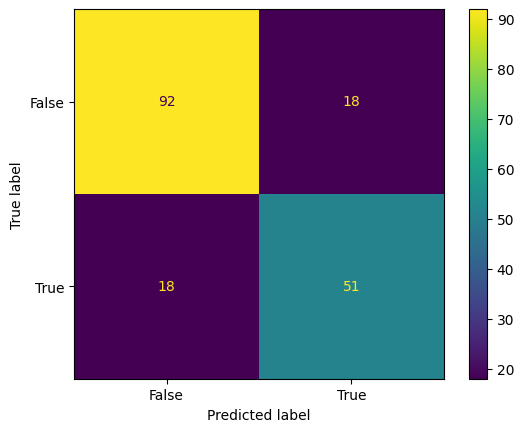

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
confusion=confusion_matrix(Y_test,y_pred)
matrix=ConfusionMatrixDisplay(confusion,display_labels=[False,True])
matrix.plot()
plt.show()